In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Loading Dataset

In [ ]:
df = pd.read_csv('thyroidDF.csv')

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

#Handling Missing Data & Outliers

In [ ]:
len(df['patient_id'])-len(df['patient_id'].drop_duplicates())

0

In [ ]:
df = df.drop(['patient_id','referral_source','query_on_thyroxine','TBG','TBG_measured','FTI_measured','TT4_measured','T4U_measured','TSH_measured','T3_measured','T3'],axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
18,63,F,t,f,t,f,f,f,f,f,f,f,f,f,f,68.00,48.0,1.02,47.0,F
19,36,F,f,f,f,f,f,f,t,t,f,f,f,f,f,1.50,90.0,1.06,85.0,-
21,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,1.20,104.0,1.08,96.0,-
22,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,5.90,88.0,0.84,105.0,-
23,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,0.05,107.0,1.13,95.0,-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7652 entries, 18 to 9157
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7652 non-null   int64  
 1   sex                  7652 non-null   object 
 2   on_thyroxine         7652 non-null   object 
 3   on_antithyroid_meds  7652 non-null   object 
 4   sick                 7652 non-null   object 
 5   pregnant             7652 non-null   object 
 6   thyroid_surgery      7652 non-null   object 
 7   I131_treatment       7652 non-null   object 
 8   query_hypothyroid    7652 non-null   object 
 9   query_hyperthyroid   7652 non-null   object 
 10  lithium              7652 non-null   object 
 11  goitre               7652 non-null   object 
 12  tumor                7652 non-null   object 
 13  hypopituitary        7652 non-null   object 
 14  psych                7652 non-null   object 
 15  TSH                  7652 non-null   

In [ ]:
df.describe()

,age,TSH,TT4,T4U,FTI
count,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000
mean,78.827365,5.173127,108.827543,0.977814,112.890805
std,1296.169513,24.181834,37.419306,0.198786,36.970210
min,1.000000,0.005000,2.000000,0.170000,1.400000
25%,38.000000,0.437500,88.000000,0.860000,94.000000
50%,56.000000,1.300000,105.000000,0.960000,109.000000
75%,69.000000,2.700000,126.000000,1.062500,128.000000
max,65526.000000,530.000000,600.000000,2.330000,642.000000


In [ ]:
df = df[(np.abs(df['age']) < 100)]
df = df[(np.abs(stats.zscore(df['TSH'])) < 3)]
df = df[(np.abs(stats.zscore(df['FTI'])) < 3)]
df = df[(np.abs(stats.zscore(df['TT4'])) < 3)]

In [ ]:
df.describe()

,age,TSH,TT4,T4U,FTI
count,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000
mean,53.284958,2.963312,107.291610,0.973336,111.608892
std,18.770833,6.665299,30.103018,0.191846,28.833609
min,1.000000,0.005000,12.000000,0.170000,9.099999
25%,38.000000,0.500000,88.000000,0.860000,94.000000
50%,56.000000,1.400000,104.000000,0.960000,109.000000
75%,69.000000,2.600000,125.000000,1.060000,127.000000
max,97.000000,77.000000,204.000000,2.330000,221.000000


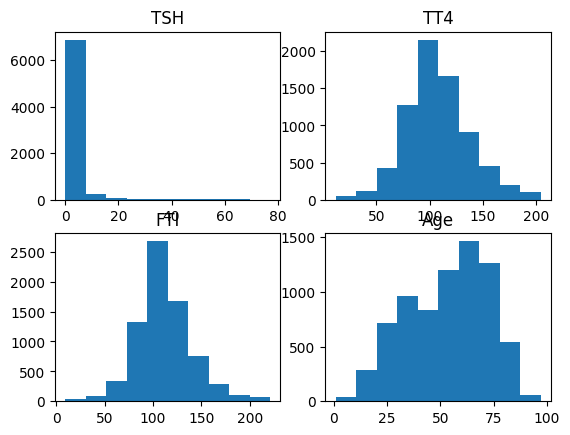

In [ ]:
plt.subplot(2,2,1)
plt.hist(df['TSH'])
plt.title('TSH')
plt.subplot(2,2,2)
plt.hist(df['TT4'])
plt.title('TT4')
plt.subplot(2,2,3)
plt.hist(df['FTI'])
plt.title('FTI')
plt.subplot(2,2,4)
plt.title('Age')
plt.hist(df['age'])
plt.show()

In [ ]:
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid',
             'B': 'hyperthyroid',
             'C': 'hyperthyroid',
             'D': 'hyperthyroid',
             'E': 'hypothyroid',
             'F': 'hypothyroid',
             'G': 'hypothyroid',
             'H': 'hypothyroid'}

df['target'] = df['target'].map(diagnoses)
df.dropna(subset=['target'], inplace=True)

In [ ]:
df['target'].unique()

array(['hypothyroid', 'negative', 'hyperthyroid'], dtype=object)

In [ ]:
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)
df.replace('M', 0, inplace=True)
df.replace('F', 1, inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) th

<Figure size 640x480 with 0 Axes>

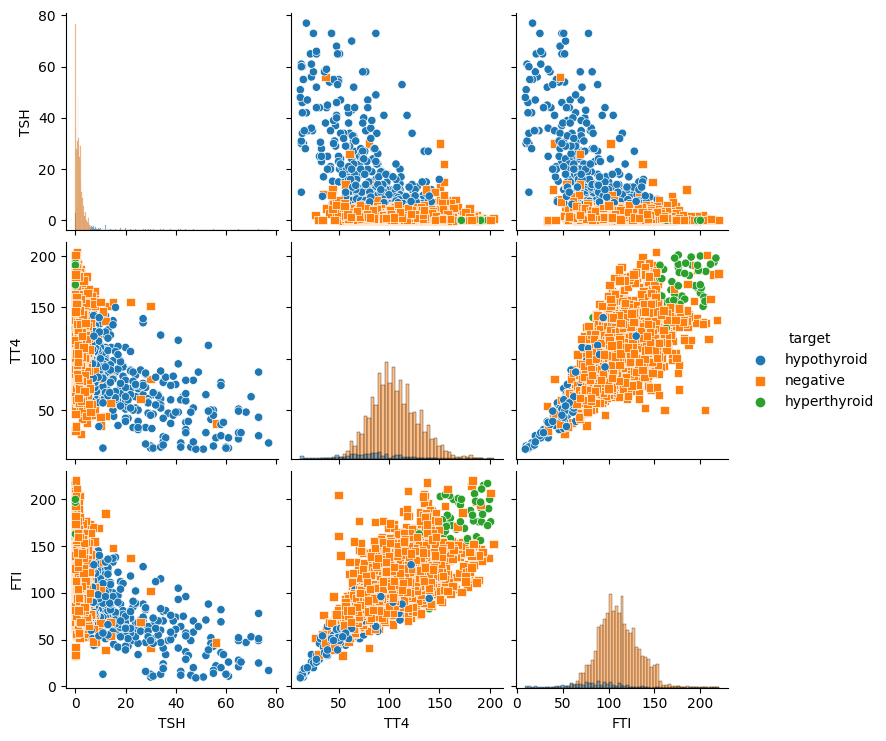

In [ ]:
plt.figure()
sns.pairplot(df[['TSH','TT4','FTI','target']], hue = "target", markers=["o", "s"], diag_kind='hist')
plt.show()